In [2]:
import numpy as np

def metodo_gradiente(A,x0,b, tol=1e-10):
    x = x0.copy()
    k = 0
    r = b - A @ x0
    sucesion = [x]
    residuos = [r]
    while np.linalg.norm(r) > tol and k < 500:
        alpha = (r @ r) / (r @ A @ r)
        x = x +  alpha* r
        r = b - A @ x
        sucesion.append(x)
        residuos.append(r) 
        k = k + 1 
    return sucesion, residuos

In [3]:
import numpy as np
Aux = np.array([[5, 1, 2, 2], 
                [1, 4, 1, 1],
                [2, 1, 3, 1],
                [1, 0, 1, 3]])
A = Aux@Aux.T
b = np.array([3, 1, 10, 2])
x0 = np.array([0, 0, 0, 0])
x, r = metodo_gradiente(A, x0, b)
for k in range(len(x)):
    print(f"Iteración {k}: \t\t Vector: {x[k]} \t\t Norma Diferencia {np.linalg.norm(r[k])}")

Iteración 0: 		 Vector: [0 0 0 0] 		 Norma Diferencia 10.677078252031311
Iteración 1: 		 Vector: [0.09040444 0.03013481 0.30134814 0.06026963] 		 Norma Diferencia 8.932018319559235
Iteración 2: 		 Vector: [-0.1528468  -0.11155662  0.40523121 -0.02342318] 		 Norma Diferencia 8.657564343614009
Iteración 3: 		 Vector: [-0.08488226 -0.07620668  0.65053383  0.02367223] 		 Norma Diferencia 7.265710803430457
Iteración 4: 		 Vector: [-0.28701388 -0.18344004  0.73525952 -0.04544187] 		 Norma Diferencia 7.054108762830817
Iteración 5: 		 Vector: [-0.23376355 -0.15050115  0.93516817 -0.00721994] 		 Norma Diferencia 5.92413388412743
Iteración 6: 		 Vector: [-0.40027594 -0.23488156  1.00417529 -0.06344113] 		 Norma Diferencia 5.753743513281341
Iteración 7: 		 Vector: [-0.35776175 -0.20644945  1.16716689 -0.03197028] 		 Norma Diferencia 4.832886013996554
Iteración 8: 		 Vector: [-0.49436186 -0.27411998  1.22338144 -0.07744222] 		 Norma Diferencia 4.694360718144778
Iteración 9: 		 Vector: [-0.46011516

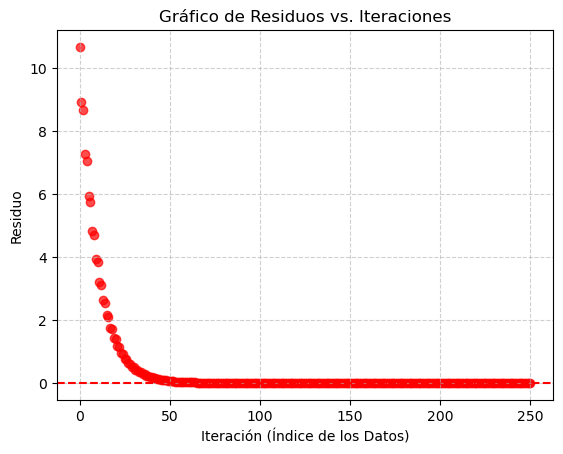

In [4]:
import matplotlib.pyplot as plt
normas_residuos = [np.linalg.norm(res_vec) for res_vec in r]
iteraciones = np.arange(len(normas_residuos))
plt.scatter(iteraciones, normas_residuos, color='red', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title('Gráfico de Residuos vs. Iteraciones')
plt.xlabel('Iteración (Índice de los Datos)')
plt.ylabel('Residuo')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [5]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
A = A @ A.T  + np.eye(3)  # Aseguramos que A sea simétrica y definida positiva
b = np.array([1, 2, 3])
x0 = np.array([0, 0, 0])
x, r = metodo_gradiente(A, x0, b)
for k in range(len(x)):
    print(f"Iteración {k}: \t\t Vector: {x[k]} \t\t Norma Diferencia {np.linalg.norm(r[k])}")

Iteración 0: 		 Vector: [0 0 0] 		 Norma Diferencia 3.7416573867739413
Iteración 1: 		 Vector: [0.0035229 0.0070458 0.0105687] 		 Norma Diferencia 0.2214027512409465
Iteración 2: 		 Vector: [ 0.0650135   0.02241845 -0.0201766 ] 		 Norma Diferencia 1.183251857866204
Iteración 3: 		 Vector: [ 0.06612757  0.02464659 -0.01683439] 		 Norma Diferencia 0.0700158217768891
Iteración 4: 		 Vector: [ 0.08557319  0.029508   -0.0265572 ] 		 Norma Diferencia 0.37418844496372033
Iteración 5: 		 Vector: [ 0.0859255   0.03021262 -0.02550026] 		 Norma Diferencia 0.02214161870897215
Iteración 6: 		 Vector: [ 0.09207494  0.03174998 -0.02857498] 		 Norma Diferencia 0.11833236636275514
Iteración 7: 		 Vector: [ 0.09218635  0.03197281 -0.02824074] 		 Norma Diferencia 0.007002007069433849
Iteración 8: 		 Vector: [ 0.09413103  0.03245898 -0.02921308] 		 Norma Diferencia 0.037421115262816614
Iteración 9: 		 Vector: [ 0.09416627  0.03252944 -0.02910738] 		 Norma Diferencia 0.0022142962375328212
Iteración 10: 		 

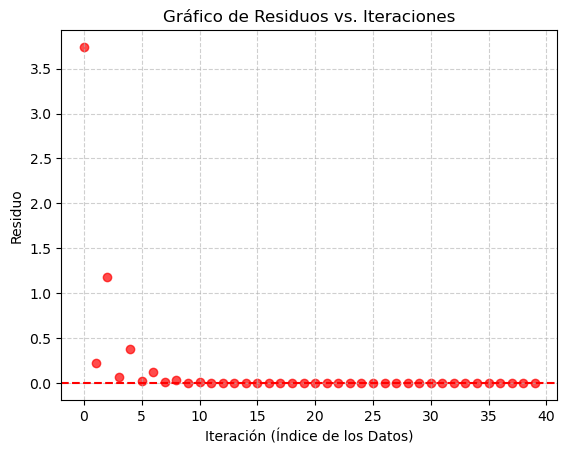

In [6]:
import matplotlib.pyplot as plt
normas_residuos = [np.linalg.norm(res_vec) for res_vec in r]
iteraciones = np.arange(len(normas_residuos))
plt.scatter(iteraciones, normas_residuos, color='red', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title('Gráfico de Residuos vs. Iteraciones')
plt.xlabel('Iteración (Índice de los Datos)')
plt.ylabel('Residuo')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [7]:
import pandas as pd
import numpy as np

def gradiente_conjugado(A, b, x0, tol=1e-10):
    x = x0.copy()
    r = A @ x - b
    p = -r
    k = 0
    
    #Guardar evolucion
    history = {
        'iteracion' : [],
        'norm' : [],
        'norm_r': []
    }
    
    while np.linalg.norm(r) > tol:
        norm_x = np.linalg.norm(x)
        norm_r = np.linalg.norm(r)
        history['iteracion'].append(k)
        history['norm'].append(norm_x)
        history['norm_r'].append(norm_r)
        Ap = A @ p
        alpha = r @ r / (p @ Ap)
        x = x + alpha * p
        r_new = r + alpha * Ap
        beta = r_new @ r_new / (r @ r)
        p = -r_new + beta * p
        r = r_new
        k += 1
    df = pd.DataFrame(history)
    return x, k, df

In [8]:
import numpy as np
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
print(np.linalg.eig(A))
A = A @ A.T
print(np.linalg.eig(A))
A = A + np.eye(3)

b = np.array([1, 2, 3])
x0 = np.zeros(3)
x, k, df = gradiente_conjugado(A, b, x0)
print(f"Solución: {x}, Iteraciones: {k}")

EigResult(eigenvalues=array([ 1.61168440e+01, -1.11684397e+00, -9.75918483e-16]), eigenvectors=array([[-0.23197069, -0.78583024,  0.40824829],
       [-0.52532209, -0.08675134, -0.81649658],
       [-0.8186735 ,  0.61232756,  0.40824829]]))
EigResult(eigenvalues=array([ 2.83858587e+02,  1.14141342e+00, -4.22289180e-16]), eigenvectors=array([[-0.21483724, -0.88723069,  0.40824829],
       [-0.52058739, -0.24964395, -0.81649658],
       [-0.82633754,  0.38794278,  0.40824829]]))
Solución: [ 0.09508197  0.03278689 -0.0295082 ], Iteraciones: 2


In [9]:
x = np.linalg.solve(A, b)
print(f"Solución con np.linalg.solve: {x}")

Solución con np.linalg.solve: [ 0.09508197  0.03278689 -0.0295082 ]


In [10]:
def  metodo_potencia(A, q, iter=100):
    for k in range(iter):
        z = A@q
        q = z / np.linalg.norm(z)
        nu = q.T @ A @ q
    return nu, q 
nu, q = metodo_potencia(A, np.array([1, 1, 1]))
print(f'Valor propio más alto: {nu}, Vector propio: {q}')

Valor propio más alto: 284.8585865803701, Vector propio: [0.21483724 0.52058739 0.82633754]


In [11]:
np.linalg.eig(A)

EigResult(eigenvalues=array([284.85858658,   2.14141342,   1.        ]), eigenvectors=array([[-0.21483724, -0.88723069,  0.40824829],
       [-0.52058739, -0.24964395, -0.81649658],
       [-0.82633754,  0.38794278,  0.40824829]]))

In [12]:
# Evolucion de nu respecto a cada valor de k
experimentos = [10, 30, 70, 100, 150, 200, 300]
nus = []
for i in experimentos:
    nu, q = metodo_potencia(A, np.array([0, 0, 1]), iter=i)
    nus.append(nu)
print(nus)

[284.8585865803701, 284.8585865803701, 284.8585865803701, 284.8585865803701, 284.8585865803701, 284.8585865803701, 284.8585865803701]


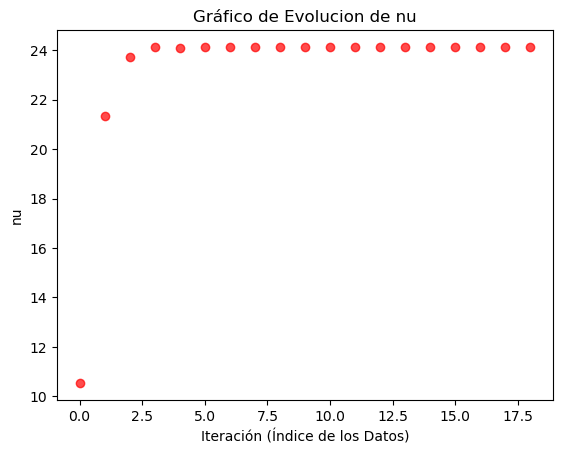

In [23]:
import matplotlib.pyplot as plt
experimentos = np.arange(len(nus))
plt.scatter(experimentos, nus, color='red', alpha=0.7)
plt.title('Gráfico de Evolucion de nu')
plt.xlabel('Iteración (Índice de los Datos)')
plt.ylabel('nu')
plt.show()

In [14]:
# Evolucion de nu respecto a cada valor de k
experimentos = range(1,20)
nus = []
for i in experimentos:
    nu, q = metodo_potencia(A, np.array([0, 0, 1]), iter=i)
    nus.append(nu)
print(nus)

[284.85421140969885, 284.8585863708456, 284.8585865803587, 284.8585865803702, 284.85858658037006, 284.8585865803701, 284.8585865803701, 284.8585865803701, 284.8585865803701, 284.8585865803701, 284.8585865803701, 284.8585865803701, 284.8585865803701, 284.8585865803701, 284.8585865803701, 284.8585865803701, 284.8585865803701, 284.8585865803701, 284.8585865803701]


In [15]:
A = np.array([[1, 2, 5, 8, 0, 6],
              [2, 3, 1, 4, 5, 0],
              [3, 1, 2, 6, 7, 8],
              [4, 5, 6, 0, 1, 2],
              [5, 6, 7, 8, 9, 0],
              [6, 7, 8, 9, 0, 1]])

In [18]:
experimentos = range(1,20)
nus = []
for i in experimentos:
    nu, q = metodo_potencia(A, np.array([0, 0, 0, 0, 0, 1]), iter=i)
    nus.append(nu)
print(nus)

[10.542857142857144, 21.343802945392937, 23.747462516770018, 24.1353554310156, 24.096033497371252, 24.13088283776062, 24.11848707994022, 24.1229417880933, 24.1213716102384, 24.121884291864248, 24.12171258757083, 24.12176712915995, 24.12174942432949, 24.121754978694387, 24.12175320826558, 24.121753760021782, 24.12175358608084, 24.121753640089125, 24.12175362317994]


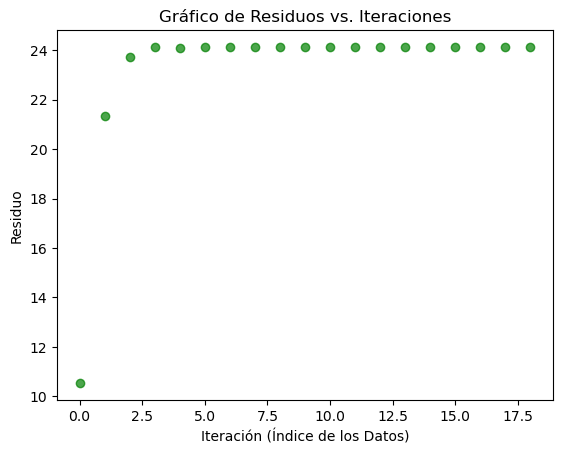

In [ ]:
import matplotlib.pyplot as plt
experimentos = np.arange(len(nus))
plt.scatter(experimentos, nus, color='green', alpha=0.7)
plt.title('Gráfico de Evolucion de nu')
plt.xlabel('Iteración (Índice de los Datos)')
plt.ylabel('nu')
plt.show()

[1.50008119016689, 1.616019654348906, 1.6188351776500731, 1.6188984092065501, 1.6188998264328995, 1.6188998581961338, 1.6188998589080188, 1.6188998589239738, 1.6188998589243306, 1.6188998589243389, 1.6188998589243389, 1.6188998589243393, 1.6188998589243386, 1.6188998589243386, 1.6188998589243395, 1.6188998589243389, 1.6188998589243393, 1.618899858924339, 1.6188998589243393]


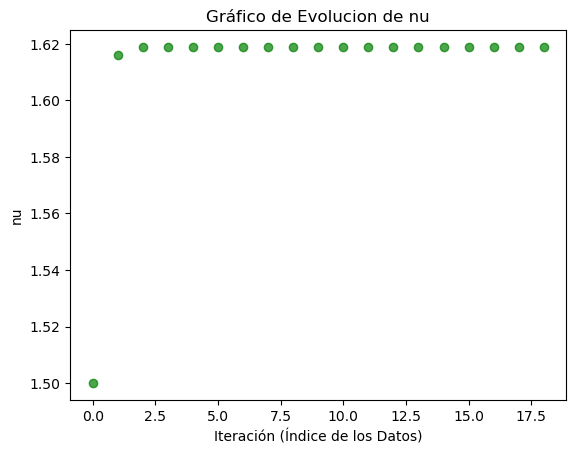

In [27]:
import scipy
import matplotlib.pyplot as plt

A = scipy.linalg.hilbert(6)
experimentos = range(1,20)
nus = []
for i in experimentos:
    nu, q = metodo_potencia(A, np.array([0, 0, 0, 0, 0, 1]), iter=i)
    nus.append(nu)
print(nus)
experimentos = np.arange(len(nus))
plt.scatter(experimentos, nus, color='green', alpha=0.7)
plt.title('Gráfico de Evolucion de nu')
plt.xlabel('Iteración (Índice de los Datos)')
plt.ylabel('nu')
plt.show()

In [ ]:
def potencia_inversa(A, z0, mu, tol, iter=100): #con mu igual a 0 tenemos el valor propio mas bajo
    n = np.max(A.shape)
    M = A-mu*np.eye(n)
    q = z0 / np.linalg.norm(z0)
    error = []
    sigma = []
    res = tol +1 
    num_iter = 0
    while(res >= tol and num_iter <= iter):
        num_iter += 1
        z = np.linalg.solve(M, q)
        q = z / np.linalg.norm(z)
        z = A @ q
        lambda = q
        nu = q.T @ A @ q
    return nu, q 